# KG measures and clustering tutorial

First, make sure you have networkx installed, here you can find the [documentation](https://networkx.org/documentation/stable/reference/index.html).

In [2]:
## Uncomment if you do not have networkx installed (you should have it installed from the RDFS tutorial)
#import sys
#!{sys.executable} -m pip install networkx

import pandas as pd
import rdflib
from rdflib import Literal
from rdflib.namespace import DC, FOAF

import networkx as nx
from owlready2 import *

In this tutorial, we will focus on how to characterize an ontology or knowledge graph.

Load the ontology, which you have previously created in the OWL tutorial (load the asserted owl file).

In [2]:
ontology = rdflib.Graph()
ontology.parse("data/my_music_ontology_inferred.owl")

<Graph identifier=N363e155feafc4ca881ef4d97185f05ee (<class 'rdflib.graph.Graph'>)>

## 1. Basic (ontology) measures

Let's first focus on calculating basic measures:
* number of classes
* number of properties
* number of individuals
* number of triples
* number of entities (classes, individuals, etc. anything that can be places in the subject possition in a triple/axiom)

We start by counting the number of classes in the ontology. This can be done using a SPARQL query. We want to get the unique classes used in the ontology. 

PREFIX owl: <http://www.w3.org/2002/07/owl#> 
SELECT DISTINCT ?s 
WHERE { ?s rdf:type owl:Class. FILTER isURI(?s) }')

This query gives as all the classes that also have a definition in the ontology. However, this does not have to equal the number of classes actually used by individuals. Hence, you need to be very specific about what the number you are retriving represents.

In [3]:
answer = list(ontology.query(
    'PREFIX owl: <http://www.w3.org/2002/07/owl#> SELECT DISTINCT ?s WHERE { ?s rdf:type owl:Class. FILTER isURI(?s) }'
))
print("Number of classes: {f}".format(f=len(answer)))
for r in answer:
    print(r)

Number of classes: 9
(rdflib.term.URIRef('http://example.org/myontology.owl#Artist'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#Location'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#Album'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#Genre'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#Song'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#Compilation'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#Single'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#Solo'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#Collaboration'),)


Even though we used a query, a lot of this information can also be retrieved with owlready2. For example, the number of classes can be retrieved with the function onto.classes(). It returns all classes in the ontology. We try it below.

In [4]:
onto_file = "data/my_music_ontology_inferred.owl"
or_ontology = get_ontology(onto_file).load()
answer = list(or_ontology.classes())

print("Number of classes: {f}".format(f=len(answer)))
for r in answer:
    print(r)

Number of classes: 9
my_music_ontology_inferred.Genre
my_music_ontology_inferred.Song
my_music_ontology_inferred.Artist
my_music_ontology_inferred.Album
my_music_ontology_inferred.Location
my_music_ontology_inferred.Compilation
my_music_ontology_inferred.Single
my_music_ontology_inferred.Solo
my_music_ontology_inferred.Collaboration


In [5]:
ind = list(or_ontology.individuals())
print(len(ind))

11


### Exercise 1

Get the following metrics from your ontology, using queries and check your answer using owlready2 functions.

* number of properties
* number of individuals
* number of triples
* number of entities (classes, individuals, etc. anything that can be places in the subject possition in a triple/axiom)

In [6]:
# number of object properties
properties = list(ontology.query(
    'PREFIX owl: <http://www.w3.org/2002/07/owl#> SELECT DISTINCT ?s WHERE { ?s rdf:type owl:ObjectProperty. FILTER isURI(?s) }'
))
print("Number of object properties: {f}".format(f=len(properties)))
for r in properties:
    print(r)

Number of object properties: 5
(rdflib.term.URIRef('http://example.org/myontology.owl#songHasGenre'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#performedBy'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#contains'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#locatedIn'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#includedIn'),)


In [7]:
properties = list(or_ontology.object_properties()) # object properties
print("Number of object properties: {f}".format(f=len(properties)))
for r in properties:
    print(r)

Number of object properties: 5
my_music_ontology_inferred.songHasGenre
my_music_ontology_inferred.performedBy
my_music_ontology_inferred.contains
my_music_ontology_inferred.includedIn
my_music_ontology_inferred.locatedIn


In [8]:
# number of data properties
properties = list(ontology.query(
    'PREFIX owl: <http://www.w3.org/2002/07/owl#> SELECT DISTINCT ?s WHERE { ?s rdf:type owl:DatatypeProperty. FILTER isURI(?s) }'
))
print("Number of data properties: {f}".format(f=len(properties)))
for r in properties:
    print(r)

Number of data properties: 3
(rdflib.term.URIRef('http://example.org/myontology.owl#artistName'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#numberOfFollowers'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#releaseDate'),)


In [9]:
properties = list(or_ontology.data_properties()) # data properties
print("Number of data properties: {f}".format(f=len(properties)))
for r in properties:
    print(r)

Number of data properties: 3
my_music_ontology_inferred.artistName
my_music_ontology_inferred.numberOfFollowers
my_music_ontology_inferred.releaseDate


In [10]:
# number of individuals
individuals = list(ontology.query(
    'PREFIX owl: <http://www.w3.org/2002/07/owl#> SELECT DISTINCT ?s WHERE { ?s rdf:type owl:NamedIndividual. FILTER isURI(?s) }'
))
print("Number of Named Individuals: {f}".format(f=len(individuals)))
for r in individuals:
    print(r)

Number of Named Individuals: 11
(rdflib.term.URIRef('http://example.org/myontology.owl#Halsey'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#Yungblud'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#Graveyard'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#Electropop'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#Manic'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#11Minutes'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#RapRock'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#11MinutesSingle'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#USA'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#CA'),)
(rdflib.term.URIRef('http://example.org/myontology.owl#LA'),)


In [11]:
individuals = list(or_ontology.individuals()) # individuals
print("Number of individuals: {f}".format(f=len(individuals)))
for r in individuals:
    print(r)

Number of individuals: 11
my_music_ontology_inferred.Electropop
my_music_ontology_inferred.RapRock
my_music_ontology_inferred.Halsey
my_music_ontology_inferred.USA
my_music_ontology_inferred.CA
my_music_ontology_inferred.LA
my_music_ontology_inferred.Yungblud
my_music_ontology_inferred.Graveyard
my_music_ontology_inferred.Manic
my_music_ontology_inferred.11Minutes
my_music_ontology_inferred.11MinutesSingle


In [12]:
# number of triples
triples = list(ontology.query(
    'PREFIX owl: <http://www.w3.org/2002/07/owl#> SELECT ?s WHERE { ?s ?p ?o. FILTER isURI(?s) } '
))
print("Number of Triples: {f}".format(f=len(triples)))

Number of Triples: 106


In [13]:
# number of entities
entities = list(ontology.query(
    'PREFIX owl: <http://www.w3.org/2002/07/owl#> SELECT ?s (count(?s) AS ?count) WHERE { ?s ?p ?o . FILTER isURI(?s) } group by ?s order by desc(?count)'
))
print("Number of entities: {f}".format(f=len(entities)))

Number of entities: 29


## 2. Converting KGs into Gs

To make use of graph measure, we need to convert our ontology into a mathematical graph networkx.


We first need to remove all the logics before we can do the conversion.
We are interested in keeping the following things:
* individual
* classes
* relationships between individuals and classes

What we need to remove is:
* restrictions
* domain/range
* property definitions

There is two ways for us to do it: we can either remove the information from the existing graph, or create a new graph using only the information we are interested in. Depending on the size and complexity of your knowledge graph, one way will be more preferrable than the other. You also need to consider if you want to keep the inferred information in your graph after conversion or not. Here, we want to keep the inferred information, but that is depended on the task you will then execute (for link prediction, you probably want the uninferred ontology and use the inferred information as a test set)

rdflib comes with a function that lets us convert a rdflib graph into an networkx graph.

In [14]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_digraph
nx_graph = rdflib_to_networkx_digraph(ontology)

list(nx_graph.nodes())

[rdflib.term.BNode('N1215fa9214654105875f3acdf8b43445'),
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Restriction'),
 rdflib.term.BNode('Na3916e35ca124f1581038cc8d752da54'),
 rdflib.term.BNode('N8cb0390bed72429a8587b21461b8075b'),
 rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#nil'),
 rdflib.term.BNode('N0d7fc8526a524490ae6e121f3c183f52'),
 rdflib.term.BNode('N4215ba4ff3714360af7fe67ce6682500'),
 rdflib.term.BNode('N7ccadcfb31b54fd39f1588e4da87848d'),
 rdflib.term.Literal('1', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#nonNegativeInteger')),
 rdflib.term.BNode('Nd9bd8cf098334838ba4cb29132a99eb0'),
 rdflib.term.URIRef('http://example.org/myontology.owl#performedBy'),
 rdflib.term.URIRef('http://example.org/myontology.owl#Album'),
 rdflib.term.URIRef('http://example.org/myontology.owl#11MinutesSingle'),
 rdflib.term.URIRef('http://example.org/myontology.owl#11Minutes'),
 rdflib.term.BNode('Na7fc0e3ac6c042d59925f8392cdf71a3'),
 rdflib.term.URIRef(

As we can see, there are some blank nodes which were convered into the graph that are not very useful for us at this stage. To analyse the graph as a mathematical graph, we don't want the class restrictions or property range and domain definision in our graph, as we are not doing any reasoning anymore.

Often times, it is easier to create a new graph than removeing already modeled information from the graph. Instead of continuing with the ontology, we will create a graph from the metadata provided in 'data/musicoset_metadata', but will adhere to the ontology from before (use the property and class names,etc.)

In [15]:
csv_albums =  pd.read_csv('data/musicoset_metadata/albums.csv',sep='\t')
print(csv_albums.columns)
csv_artists =  pd.read_csv('data/musicoset_metadata/artists.csv',sep='\t')
print(csv_artists.columns)
csv_songs =  pd.read_csv('data/musicoset_metadata/songs.csv',sep='\t')
print(csv_songs.columns)
csv_tracks =  pd.read_csv('data/musicoset_metadata/tracks.csv',sep='\t')
print(csv_tracks.columns)
csv_releases =  pd.read_csv('data/musicoset_metadata/releases.csv',sep='\t')
print(csv_releases.columns)

Index(['album_id', 'name', 'billboard', 'artists', 'popularity',
       'total_tracks', 'album_type', 'image_url'],
      dtype='object')
Index(['artist_id', 'name', 'followers', 'popularity', 'artist_type',
       'main_genre', 'genres', 'image_url'],
      dtype='object')
Index(['song_id', 'song_name', 'billboard', 'artists', 'popularity',
       'explicit', 'song_type'],
      dtype='object')
Index(['song_id', 'album_id', 'track_number', 'release_date',
       'release_date_precision'],
      dtype='object')
Index(['artist_id', 'album_id', 'release_date', 'release_date_precision'], dtype='object')


In [16]:
# We have prepared a simplified ontology to use in this tutorial
# This ontology doesn't have any restrictions or domain/range definitions
# this is to avoid blank nodes when converting to networx
music_onto = rdflib.Graph()
music_onto.parse("data/music_onto_simple.rdf")

nx_music = rdflib_to_networkx_digraph(music_onto)
list(nx_music.nodes())

[rdflib.term.URIRef('http://test.org/myonto.owl#SoloArtist'),
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Class'),
 rdflib.term.URIRef('http://test.org/myonto.owl#CollaboratingArtist'),
 rdflib.term.URIRef('http://test.org/myonto.owl#bandMember'),
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#ObjectProperty'),
 rdflib.term.URIRef('http://test.org/myonto.owl#hasGenre'),
 rdflib.term.URIRef('http://test.org/myonto.owl#Member'),
 rdflib.term.URIRef('http://test.org/myonto.owl#followers'),
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#DatatypeProperty'),
 rdflib.term.URIRef('http://test.org/myonto.owl#releaseDate'),
 rdflib.term.URIRef('http://test.org/myonto.owl#SubGenre'),
 rdflib.term.URIRef('http://test.org/myonto.owl#Genre'),
 rdflib.term.URIRef('http://test.org/myonto.owl#Person'),
 rdflib.term.URIRef('http://test.org/myonto.owl#Location'),
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Thing'),
 rdflib.term.URIRef('http://test.org/myonto.owl#Artist'),
 rdflib.te

This ontology no longer produces any blank nodes. So we can now populate it with the metadata loaded from the CSV.

In [17]:
EX = rdflib.Namespace("http://test.org/myonto.owl#")
from rdflib import OWL,RDF,RDFS,URIRef
import json
solo_artists = ["singer",'rapper','DJ',]
band = ['band','duo']
undef = ['-']

for index, artist in csv_artists.iterrows():
    art = URIRef(EX+artist["artist_id"])
    if artist["artist_type"] in solo_artists:
        music_onto.add((art,RDF.type,EX.SoloArtist))
    elif artist["artist_type"] in band:
        music_onto.add((art,RDF.type,EX.Band))
    else:
        music_onto.add((art,RDF.type,EX.Artist))
        
    music_onto.add((art,EX.name,Literal(artist["name"])))
    music_onto.add((art,EX.followers,Literal(artist["followers"])))
    genre = URIRef(EX+artist["main_genre"].replace(' ', '_'))
    music_onto.add((art,EX.hasGenre,genre))
    music_onto.add((genre,RDF.type,EX.Genre))
    
for index, song in csv_songs.iterrows():
    s = URIRef(EX+song["song_id"])
    music_onto.add((s,RDF.type,EX.Song))
    music_onto.add((s,EX.name,Literal(song['song_name'])))
    artists = eval(song['artists'])
    for key in artists.keys():
        art = URIRef(EX+key)
        music_onto.add((art,EX.authorOf,s))

Feel free to extend your ontology to include albums and track information below. You might have to extend the basic ontology as well with some additional relations.

In [18]:
EX = rdflib.Namespace("http://test.org/myonto.owl#")
music_onto.add((EX.Album, RDF.type, OWL.Class))
music_onto.add((EX.HasTotalTracks, RDF.type, OWL.ObjectProperty)) 
nx_music_onto = rdflib_to_networkx_digraph(music_onto)

In [19]:
for index, album in csv_albums.iterrows():
    alb = URIRef(EX,album["album_id"])
    music_onto.add((alb, RDF.type, EX.Album))
    music_onto.add((alb,EX.name,Literal(album['name'])))
    music_onto.add((Literal(album['artists']),EX.authorOf, Literal(album['name'])))

In [20]:
for index, album in csv_releases.iterrows():
    alb = URIRef(EX,album["album_id"])
    release_date = URIRef(EX,album["release_date"])
    music_onto.add((alb, EX.releaseDate,Literal(album['release_date'])))

Now we convert the ontology to a networkx graph.

In [21]:
nx_music_graph = rdflib_to_networkx_digraph(music_onto)
list(nx_music_graph.nodes())

[rdflib.term.URIRef('http://test.org/myonto.owl#1jROHCeEzDr6VnV8EnBnik'),
 rdflib.term.URIRef('http://test.org/myonto.owl#Song'),
 rdflib.term.URIRef('http://test.org/myonto.owl#1Q45nhioxaxZTDjR0iaMWp'),
 rdflib.term.Literal("Thi'sl"),
 rdflib.term.URIRef('http://test.org/myonto.owl#6WlxcZKpEV6Bwe9InoVhMp'),
 rdflib.term.Literal("{'49vCIUW46QY3L5vo1xVFoy': 'Trae Tha Truth'}"),
 rdflib.term.Literal('Life Goes On'),
 rdflib.term.URIRef('http://test.org/myonto.owl#3ZN1AGPeivQaGK7lWgec7X'),
 rdflib.term.URIRef('http://test.org/myonto.owl#Band'),
 rdflib.term.Literal("{'5ZoVY6c0cokQrn448eRqSc': 'Hiroshima'}"),
 rdflib.term.Literal('Go'),
 rdflib.term.URIRef('http://test.org/myonto.owl#6edzoyx2aOvZpdFeCCWU1t'),
 rdflib.term.URIRef('http://test.org/myonto.owl#-'),
 rdflib.term.URIRef('http://test.org/myonto.owl#'),
 rdflib.term.Literal('The Baddest'),
 rdflib.term.Literal("{'7jmTilWYlKOuavFfmQAcu6': 'Barbra Streisand'}"),
 rdflib.term.Literal('Till I Loved You'),
 rdflib.term.URIRef('http://t

### Exercise 2

* Convert your knowledge graph or ontology into a networkx graph. 
* Write a function that checks for blank nodes in your networkx graph, and apply it both to the graph created above (nx_graph) and to the one you have created just now.

In [22]:
def checkBlankNodes(net):
    blanknodes = []
    count = 0
    n = list(net.nodes())
    for i in range(len(n)):
        text = str(n[i])
        if not re.search('http', text):
            count += 1
            blanknodes.append(text)
    return blanknodes, count

In [23]:
bns, c = checkBlankNodes(nx_graph)
print(f"# of blank nodes: {c}\n")
print(bns)

# of blank nodes: 27

['N1215fa9214654105875f3acdf8b43445', 'Na3916e35ca124f1581038cc8d752da54', 'N8cb0390bed72429a8587b21461b8075b', 'N0d7fc8526a524490ae6e121f3c183f52', 'N4215ba4ff3714360af7fe67ce6682500', 'N7ccadcfb31b54fd39f1588e4da87848d', '1', 'Nd9bd8cf098334838ba4cb29132a99eb0', 'Na7fc0e3ac6c042d59925f8392cdf71a3', 'N947d6c54179d4d2fba8bc932d7044f51', 'N6d82d39d66494d0997d91b4212abd6c2', '3800000', 'N6554a36c28ee49119c728eea9fb1efa3', 'Ndce5a399b5a246f994b8006e36e50bfb', 'N1e30b7983fa64e528ac47e834a290a14', 'Nd8c7829258e945b78a782ec13f943722', 'N681f1658385044d7bcdc3c500c24885f', 'N3fd97bdf8f2344da8215cbc267768f12', 'N3397ddb448b8407186b1659f7cb3a7cf', 'Ashley Nicolette Frangipane', '31700000', 'Na6c599c2ed0342a4b31c413c5c4a3c1b', 'Nfeaba3a69ff34454a7c6b82898449d6a', 'Dominic Richard Harrison', '13-02-2019', '13-09-2019', '2']


In [24]:
bns, c = checkBlankNodes(nx_music)
print(f"# of blank nodes: {c}\n")
print(bns)

# of blank nodes: 0

[]


## 3. Graph Measures

Now we can calculate some graph measures over the networkX graph. The library provides a lot of different measures that can be calculated. Always check what kind of assumptions the measure has:
* directed or undirected graph?
* does the graph have to be connected?

We will first calculate some basic graph measures: number of nodes, number of edges and the density of the graph.

In [25]:
print("Number of Nodes: {n}".format(n=nx.number_of_nodes(nx_music_graph)))
print("Number of Edges: {n}".format(n=nx.number_of_edges(nx_music_graph)))
print("Density of Graph: {n}".format(n=nx.density(nx_music_graph)))

Number of Nodes: 108804
Number of Edges: 168023
Density of Graph: 1.4193287587675526e-05


We will now look at the distribution of degree of our nodes by calculating (retrieving) the degree for each node and plotting a histogram. We do this with the original ontology, to show how it works. The graph which we just created is not dense enough to show much in a histogram. 

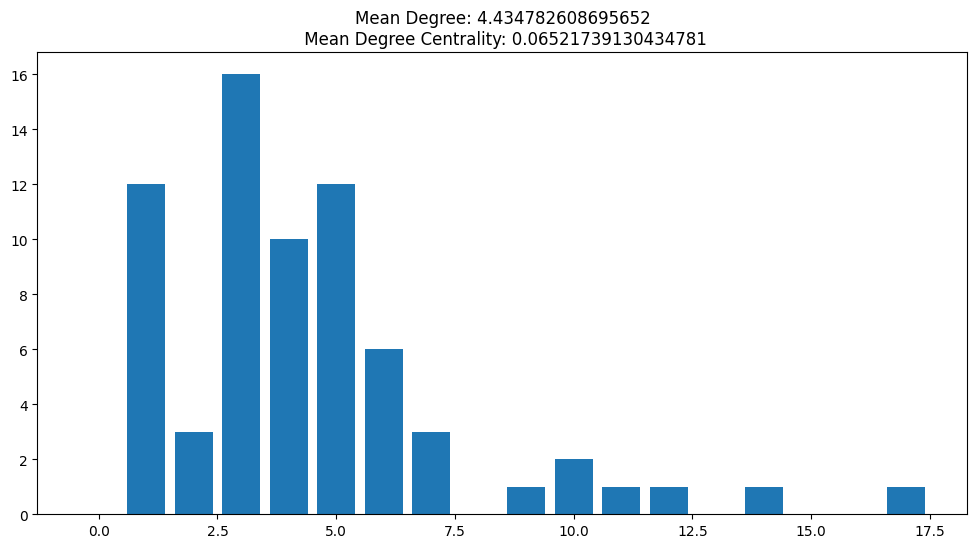

In [26]:
import matplotlib.pyplot as plt
import numpy as np

histdegree = pd.DataFrame(nx.degree_histogram(nx_graph))
degree = dict(nx.degree(nx_graph))


mean_degree = np.mean(list(degree.values()))
mean_degree_centrality = np.mean(list(nx.degree_centrality(nx_graph).values()))

fig, ax = plt.subplots(figsize=(12,6)) 
ax.bar(histdegree.index.values,histdegree[0])

plt.title("Mean Degree: {n1}\n Mean Degree Centrality: {n2}".format(n1=mean_degree,n2=mean_degree_centrality))
plt.show()

Another very useful measure is the clustering coefficient, which tells us how likely the nodes are to build clusters. This is a global measure, but can also be calculated for each node.

In [27]:
print("Clustering coefficient: {n}".format(n=nx.average_clustering(nx_graph)))

Clustering coefficient: 0.08890310575093185


### Exercise 3

Calculate and visualise the centrality of the music graph. Use a different measure than degree. For different measures you can refer to this online [documentation]{https://networkx.org/documentation/stable/reference/algorithms/centrality.html}. Choose wisely though, some measures require a long time to calculate (like betweenness or eigenvector centrality).

As a second step, take some time to explore the documentation of networkx. Is there something other you can calculate and learn about the graph?

In [28]:
histdegree = pd.DataFrame(nx.degree_histogram(nx_music))
degree = dict(nx.degree(nx_music))
histdegree = histdegree[:10]
mean_degree = np.mean(list(degree.values()))
mean_degree_centrality = np.mean(list(nx.degree_centrality(nx_music).values()))

Mean degree: 2.4166666666666665
Mean degree centrality: 0.10507246376811592


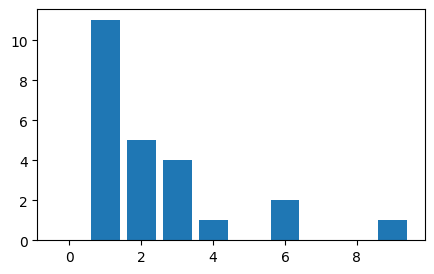

In [29]:
fig, ax = plt.subplots(figsize=(5, 3)) 
ax.bar(histdegree.index.values[:10], histdegree[0])
print(f"Mean degree: {mean_degree}")
print(f"Mean degree centrality: {mean_degree_centrality}")
plt.show()

In [30]:
histdegree = pd.DataFrame(nx.degree_histogram(nx_music_graph))
degree = dict(nx.degree(nx_music_graph))
histdegree = histdegree[:10]
mean_degree = np.mean(list(degree.values()))
mean_degree_centrality = np.mean(list(nx.degree_centrality(nx_music_graph).values()))

Mean degree: 3.0885445388037205
Mean degree centrality: 2.8386575175351048e-05


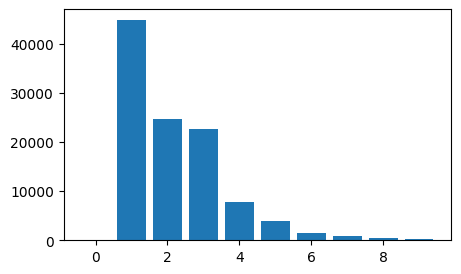

In [31]:
fig, ax = plt.subplots(figsize=(5, 3)) 
ax.bar(histdegree.index.values[:10], histdegree[0])
print(f"Mean degree: {mean_degree}")
print(f"Mean degree centrality: {mean_degree_centrality}")
plt.show()

In [32]:
nx.in_degree_centrality(nx_music)

{rdflib.term.URIRef('http://test.org/myonto.owl#SoloArtist'): 0.0,
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Class'): 0.3913043478260869,
 rdflib.term.URIRef('http://test.org/myonto.owl#CollaboratingArtist'): 0.0,
 rdflib.term.URIRef('http://test.org/myonto.owl#bandMember'): 0.0,
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#ObjectProperty'): 0.2608695652173913,
 rdflib.term.URIRef('http://test.org/myonto.owl#hasGenre'): 0.0,
 rdflib.term.URIRef('http://test.org/myonto.owl#Member'): 0.0,
 rdflib.term.URIRef('http://test.org/myonto.owl#followers'): 0.0,
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#DatatypeProperty'): 0.13043478260869565,
 rdflib.term.URIRef('http://test.org/myonto.owl#releaseDate'): 0.0,
 rdflib.term.URIRef('http://test.org/myonto.owl#SubGenre'): 0.0,
 rdflib.term.URIRef('http://test.org/myonto.owl#Genre'): 0.043478260869565216,
 rdflib.term.URIRef('http://test.org/myonto.owl#Person'): 0.043478260869565216,
 rdflib.term.URIRef('http://test.org/myonto

In [33]:
print(nx.degree_centrality(nx_music))

{rdflib.term.URIRef('http://test.org/myonto.owl#SoloArtist'): 0.13043478260869565, rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Class'): 0.3913043478260869, rdflib.term.URIRef('http://test.org/myonto.owl#CollaboratingArtist'): 0.08695652173913043, rdflib.term.URIRef('http://test.org/myonto.owl#bandMember'): 0.043478260869565216, rdflib.term.URIRef('http://www.w3.org/2002/07/owl#ObjectProperty'): 0.2608695652173913, rdflib.term.URIRef('http://test.org/myonto.owl#hasGenre'): 0.043478260869565216, rdflib.term.URIRef('http://test.org/myonto.owl#Member'): 0.08695652173913043, rdflib.term.URIRef('http://test.org/myonto.owl#followers'): 0.043478260869565216, rdflib.term.URIRef('http://www.w3.org/2002/07/owl#DatatypeProperty'): 0.13043478260869565, rdflib.term.URIRef('http://test.org/myonto.owl#releaseDate'): 0.043478260869565216, rdflib.term.URIRef('http://test.org/myonto.owl#SubGenre'): 0.08695652173913043, rdflib.term.URIRef('http://test.org/myonto.owl#Genre'): 0.13043478260869565, rdf

## 4. Visualizing your graph

With networkX you can easily visualize your ontology/graph, no matter if they include blank nodes or not. The visualisations are powered by matplotlib. We will use here the first ontology, which also has blank nodes, but is much simpler to visualize.

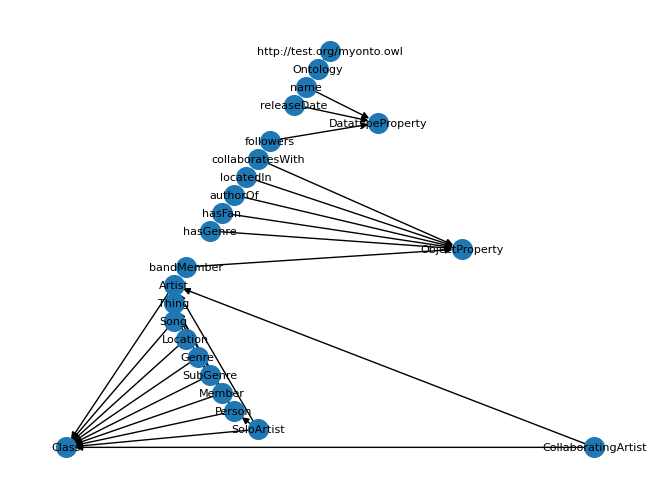

In [34]:
mapping = pd.DataFrame(nx_music.nodes())
mapping['new_names'] = mapping[0].str.split("#",n=1,expand=False)
mapping['label'] = 'NA'
# print(mapping)
mapping_copy = mapping.copy()

for ind, m in mapping_copy.iterrows():
    l = len(m['new_names'])
    names = m['new_names']
    mapping.loc[ind,'label'] = names[l-1]
    
map_dict = dict(zip(mapping[0],mapping['label']))

nx_music_nl = nx.relabel_nodes(nx_music,map_dict,copy=True)

nx.draw_planar(nx_music_nl,
                 with_labels=True,
                node_size=200, font_size=8 )

### Exercise 4

Try to visualize your own ontology below. Don't shy away from looking for and trying other approaches to visualize an ontology, giving nodes different colors, or varying thickness/color of the edges based on the type of relation.

DiGraph with 13 nodes and 15 edges


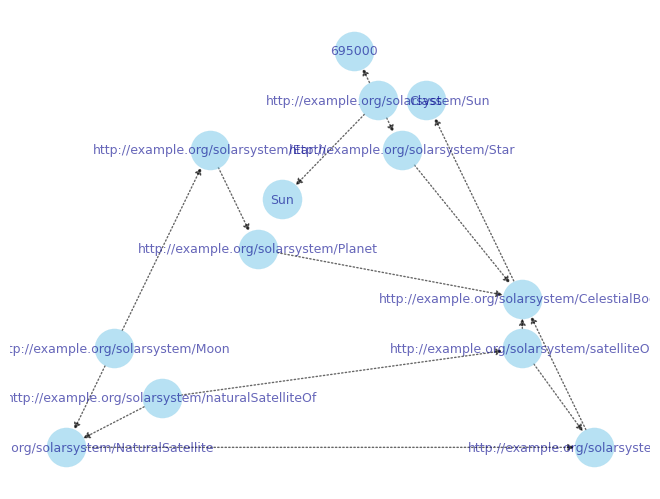

In [35]:
m_ontology = rdflib.Graph()
m_ontology.parse("data/yourRDF.ttl")
my_nx_graph = rdflib_to_networkx_digraph(m_ontology)

mapping = pd.DataFrame(my_nx_graph.nodes())
mapping['new_names'] = mapping[0].str.split("#", n=1, expand=False)
mapping['label'] = 'NA'

mapping_copy = mapping.copy()
for ind, m in mapping_copy.iterrows():
    l = len(m['new_names'])
    names = m['new_names']
    mapping.loc[ind,'label'] = names[l - 1]
    
map_dict = dict(zip(mapping[0], mapping['label']))
nx_graph_nl = nx.relabel_nodes(my_nx_graph, map_dict, copy=True)
print(nx_graph_nl)

nx.draw_planar(nx_graph_nl, with_labels=True, node_size=800, font_size=9, font_color = "darkblue",
               alpha=0.6, linewidths=0.1, style=':', node_color="skyblue", node_shape="o")

## 5. Clustering

NetworkX already comes with some clustering algorithms. We will try the one introduced in the theory part of the class, Louvain clustering algorithm.

In [36]:
import networkx.algorithms.community as nx_comm

music_ontology = rdflib.Graph()
music_ontology.parse("data/music_onto_simple.rdf")
nx_graph = rdflib_to_networkx_digraph(music_ontology)

communities = nx_comm.louvain_communities(nx_graph, resolution=1)
print(1,len(communities),nx.number_of_nodes(nx_graph))

1 5 24


Now we can visualize the graph and the communities within it. Alternatively you can also visualize a community as an example alone. (WARNING: this might take a while...)

/Users/arina/.pyenv/versions/3.10.13/envs/krwvenv/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


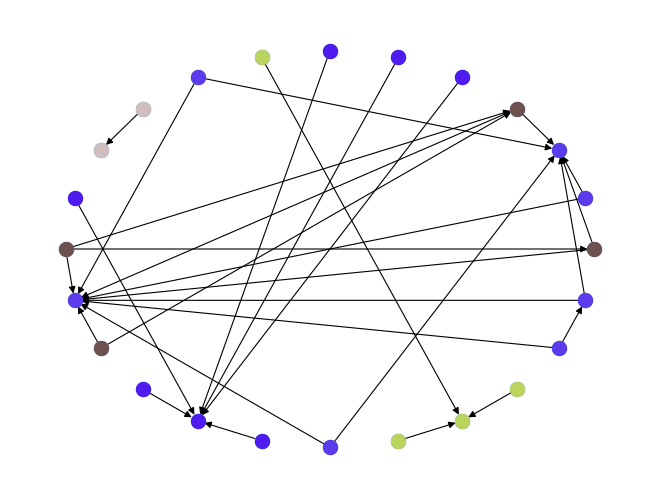

In [37]:
pos = nx.shell_layout(nx_graph)

nx.draw(nx_graph, pos, edge_color='k',font_weight='light', 
        node_size= 100, width= 0.8)
for com in communities:
    nx.draw_networkx_nodes(nx_graph,
                           pos,
                           nodelist=com, 
                           node_color=np.random.rand(3,),
                           node_size=100)
plt.show()

If clustering is successful and helpful is very dependent on your graph. It is beneficial to remove the information from your graph that is not helpful for the clustering, like the T-box of your ontology, as this "polutes" the graph. The clustering algorithm is not made for knowledge graphs but rather for mathematical graphs, hence less semantics is better.

In the case above, the graph is not dense enough to produce meaningful clusters, which is why there are 38706 clusters. 

### Exercise 5

Try to cluster your own graph. You might have to create a mathematical graph first, rather than just converting your knowledge graph, as that will lead to better and more insightful results.

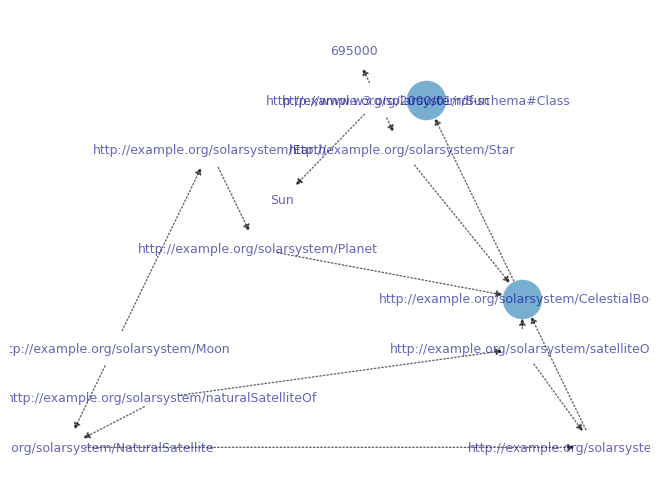

In [38]:
m_ontology = rdflib.Graph()
m_ontology.parse("data/yourRDF.ttl")
my_nx_graph = rdflib_to_networkx_digraph(m_ontology)

communities = nx_comm.louvain_communities(my_nx_graph, resolution=1)

nx.draw_planar(my_nx_graph, with_labels=True, node_size=800, font_size=9 , font_color = "darkblue",
               nodelist = communities[1],alpha=0.6,linewidths=0.1,style=':')

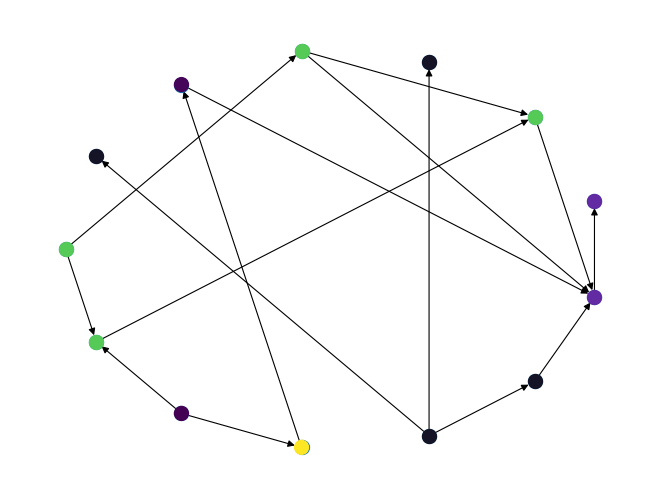

In [39]:
pos = nx.shell_layout(my_nx_graph)

nx.draw(my_nx_graph, pos, edge_color='k',font_weight='light', 
        node_size= 100, width= 0.8)

for com in communities:
    nx.draw_networkx_nodes(my_nx_graph,
                           pos,
                           nodelist=com, 
                           node_color=np.random.rand(3,),
                           node_size=100)
plt.show()

In [14]:
onto_file = "/Users/arina/Downloads/New_UserKG.rdf"

ontology = rdflib.Graph()
ontology.parse(onto_file)

answer = list(ontology.query(
    'PREFIX owl: <http://www.w3.org/2002/07/owl#> SELECT DISTINCT ?s WHERE { ?s rdf:type owl:Class. FILTER isURI(?s) }'
))
print("Number of classes: {f}".format(f=len(answer)))
for r in answer:
    print(r)

Number of classes: 69
(rdflib.term.URIRef('http://www.semanticweb.org/aledpro/ontologies/2024/2/untitled-ontology-83/Age'),)
(rdflib.term.URIRef('http://www.semanticweb.org/aledpro/ontologies/2024/2/untitled-ontology-83/AgeRiskFactor'),)
(rdflib.term.URIRef('http://www.semanticweb.org/aledpro/ontologies/2024/2/untitled-ontology-83/AirQuality'),)
(rdflib.term.URIRef('http://www.semanticweb.org/aledpro/ontologies/2024/2/untitled-ontology-83/Alcohol'),)
(rdflib.term.URIRef('http://www.semanticweb.org/aledpro/ontologies/2024/2/untitled-ontology-83/AlcoholRiskFactor'),)
(rdflib.term.URIRef('http://www.semanticweb.org/aledpro/ontologies/2024/2/untitled-ontology-83/BMI'),)
(rdflib.term.URIRef('http://www.semanticweb.org/aledpro/ontologies/2024/2/untitled-ontology-83/BMIRiskFactor'),)
(rdflib.term.URIRef('http://www.semanticweb.org/aledpro/ontologies/2024/2/untitled-ontology-83/BloodPressureLevel'),)
(rdflib.term.URIRef('http://www.semanticweb.org/aledpro/ontologies/2024/2/untitled-ontology-83

In [18]:
print(ontology.serialize(format="turtle"))

@prefix : <http://www.semanticweb.org/aledpro/ontologies/2024/2/untitled-ontology-83/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://www.semanticweb.org/aledpro/ontologies/2024/2/untitled-ontology-83> a owl:Ontology .

:AirQuality a owl:Class ;
    rdfs:subClassOf :Surroundings .

:BMI23 a owl:NamedIndividual ;
    :hasLowRiskFactor :HealthyWeight .

:Banana a :Fruit,
        owl:NamedIndividual ;
    :hasLowRiskFactor :DietaryFibre,
        :Potassium .

:BloodPressureLevel145_90mmHg a owl:NamedIndividual ;
    :hasBloodPressureLevelRiskFactor :HighBloodPressure .

:Cabbage a :Vegetable,
        owl:NamedIndividual ;
    :hasLowRiskFactor :LowStarch .

:Cannabis a owl:NamedIndividual ;
    :hasDrugsRiskFactor :NumbFeeling .

:CardiovascularDisease a owl:NamedIndividual .

:Carpenter a owl:NamedIndividual ;


In [15]:
or_ontology = get_ontology(onto_file).load()
answer = list(or_ontology.classes())

print("Number of classes: {f}".format(f=len(answer)))
for r in answer:
    print(r)

Number of classes: 69
New_UserKG.Risk
New_UserKG.Recommendation
New_UserKG.Person
New_UserKG.Alcohol
New_UserKG.Soda
New_UserKG.Food
New_UserKG.Age
New_UserKG.AgeRiskFactor
New_UserKG.AlcoholRiskFactor
New_UserKG.BMI
New_UserKG.BMIRiskFactor
New_UserKG.BloodPressureLevel
New_UserKG.BloodPressureLevelRiskFactor
New_UserKG.CholesterolLevel
New_UserKG.CholesterolLevelRiskFactor
New_UserKG.Drugs
New_UserKG.DrugsRiskFactor
New_UserKG.Emotion
New_UserKG.EmotionRiskFactor
New_UserKG.FamilySituation
New_UserKG.HighRiskFood
New_UserKG.FoodRiskFactor
New_UserKG.GeneticDisease
New_UserKG.GeneticDiseaseRiskFactor
New_UserKG.GlucoseMetabolism
New_UserKG.GlucoseMetabolismRiskFactor
New_UserKG.HeartDisease
New_UserKG.HeartDiseaseRiskFactor
New_UserKG.Hydration
New_UserKG.HydrationLevelRiskFactor
New_UserKG.Job
New_UserKG.JobRiskFactor
New_UserKG.KidneyFunction
New_UserKG.KidneyFunctionRiskFactor
New_UserKG.LowRiskFactor
New_UserKG.LowRiskFood
New_UserKG.PancreasDisease
New_UserKG.PancreasDiseaseRiskF